<a href="https://colab.research.google.com/github/Equipe16-IAA/IAA015/blob/main/IAA015_Caixeiro_Viajante_GA_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
from random import randint, random
import random
import matplotlib.pyplot as plt
import math

#Criando as funções principais do Algorítmo Genético

## Criando as coordenadas das 100 cidades

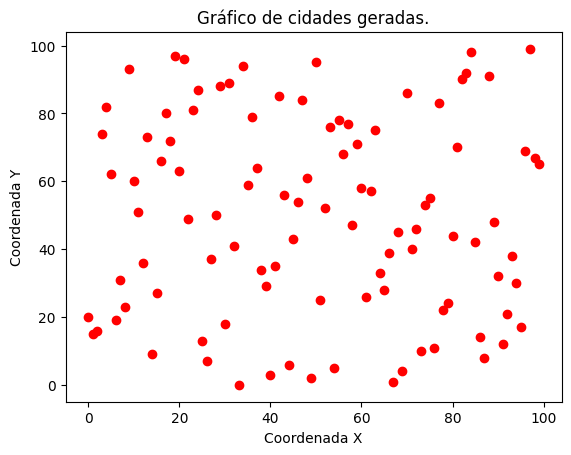

In [2]:
x_points = list(range(100))
y_points = list(range(100))

random.shuffle(x_points)
random.shuffle(y_points)

plt.title("Gráfico de cidades geradas.")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.plot(x_points, y_points, 'ro')
plt.show()

###População Inicial

In [3]:
def populacaoInicial(tamanho):
  percursos = []
  percurso = []
  for i in range(0, tamanho):
    cidades = list(range(0, 100))
    listaCidades = cidades.copy()
    random.shuffle(listaCidades)
    for cidade in cidades:
      cidadePercurso = random.choice(listaCidades)
      listaCidades.remove(cidadePercurso)
      percurso.append(cidadePercurso)
    percursos.append(percurso)
    percurso = []
    cidades = []
  return percursos;

In [5]:
##DEBUG função População Inicial

percursos = populacaoInicial(10)

for percurso in percursos:
  print(percurso)
  print("\n")

[26, 63, 77, 73, 52, 41, 88, 67, 65, 36, 49, 20, 37, 68, 35, 97, 22, 95, 23, 17, 47, 2, 43, 13, 72, 66, 0, 56, 93, 46, 84, 79, 69, 58, 51, 91, 11, 86, 48, 81, 50, 71, 4, 62, 53, 87, 96, 61, 28, 10, 16, 64, 60, 25, 44, 74, 42, 85, 40, 24, 30, 45, 27, 31, 18, 8, 14, 19, 7, 90, 59, 32, 76, 55, 9, 82, 92, 75, 78, 70, 5, 33, 94, 12, 6, 3, 98, 39, 29, 38, 1, 15, 83, 89, 54, 21, 99, 57, 80, 34]


[26, 67, 42, 33, 62, 74, 89, 84, 66, 4, 70, 83, 56, 77, 90, 15, 54, 36, 80, 64, 85, 43, 20, 39, 14, 49, 73, 97, 81, 59, 34, 76, 79, 21, 24, 63, 48, 44, 22, 72, 40, 23, 58, 96, 5, 31, 2, 99, 65, 91, 37, 46, 3, 71, 27, 47, 75, 95, 55, 86, 68, 11, 78, 69, 16, 9, 93, 25, 94, 28, 18, 17, 7, 30, 57, 1, 53, 87, 6, 19, 29, 82, 52, 12, 88, 61, 38, 41, 98, 32, 92, 10, 45, 51, 50, 35, 0, 13, 60, 8]


[95, 62, 3, 29, 37, 4, 22, 97, 98, 44, 40, 8, 17, 85, 51, 11, 14, 92, 61, 80, 25, 79, 21, 86, 45, 10, 94, 6, 24, 76, 52, 43, 87, 34, 50, 93, 1, 96, 27, 28, 88, 68, 47, 81, 7, 55, 72, 91, 58, 56, 46, 0, 75, 16, 99, 

###Verifica Elementos Duplicados

In [6]:
def has_duplicates(lst):
    n = max(set(lst), key=lst.count)
    return lst.count(n) > 1

In [7]:
##DEBUG função duplicados
listaDuplicados = [2, 1, 2, 5, 2]
print(has_duplicates(listaDuplicados))

listaSemDuplicados = [1, 2, 3, 4, 5]
print(has_duplicates(listaSemDuplicados))

True
False


###Função de Avaliação (fit)

In [20]:
##Calcular Distância Euclidiana
##distancia = sqrt(((x2 - x1) ^ 2) + ((y2 - y1) ^ 2));
def FuncaoDeAvaliacao(percursos):
  soma_distancia = np.zeros(len(percursos));
  cidadeAnterior = 0;
  cidadeInicial = 0;
  cidadeFinal = 0;
  for index, percurso in enumerate(percursos):
    print(percurso)
    for i, cidade in enumerate(percurso):
      if cidadeAnterior == 0:
        cidadeAnterior = cidade;
        cidadeInicial = cidade;
      elif cidadeAnterior == cidade:
        continue
      else:
        if i < len(percurso) - 1:
          soma_distancia[index] += math.sqrt((x_points[percurso[i + 1]] - x_points[0])**2 + (y_points[percurso[i + 1]] - y_points[0])**2);
        else:
          soma_distancia[index] += math.sqrt((x_points[percurso[i]] - x_points[0])**2 + (y_points[percurso[i]] - y_points[0])**2);
      cidadeAnterior = cidade;
      cidadeFinal = cidade;
    if has_duplicates(percurso):
      soma_distancia[index] = 999999999
    cidadeAnterior = 0
    cidadeInicial = 0
    cidadeFinal = 0
  return soma_distancia;


In [21]:
##DEBUG Função de Avaliação

percursos = populacaoInicial(10)
print(percursos)
avaliacao = FuncaoDeAvaliacao(percursos)
print(avaliacao)

[[85, 21, 7, 43, 2, 80, 82, 76, 45, 13, 3, 17, 73, 96, 37, 78, 41, 52, 69, 81, 30, 98, 62, 54, 28, 4, 56, 47, 44, 39, 87, 11, 14, 50, 40, 48, 95, 20, 31, 26, 64, 90, 38, 46, 97, 25, 59, 71, 10, 88, 77, 55, 35, 16, 0, 53, 19, 74, 51, 5, 49, 32, 9, 75, 94, 60, 36, 63, 27, 18, 84, 79, 61, 99, 93, 91, 68, 29, 15, 57, 33, 66, 83, 67, 65, 89, 22, 72, 86, 6, 70, 12, 42, 8, 1, 24, 23, 34, 92, 58], [1, 68, 95, 44, 83, 31, 6, 0, 56, 27, 9, 74, 39, 79, 65, 40, 29, 36, 70, 88, 72, 71, 4, 47, 12, 3, 62, 28, 92, 96, 22, 54, 84, 10, 8, 85, 55, 48, 38, 91, 57, 89, 15, 94, 73, 69, 60, 50, 18, 24, 98, 97, 93, 16, 53, 17, 14, 46, 21, 32, 82, 80, 63, 7, 75, 20, 99, 86, 45, 13, 58, 87, 41, 23, 33, 64, 78, 52, 76, 43, 35, 42, 66, 81, 5, 67, 77, 61, 30, 11, 37, 26, 19, 51, 2, 34, 25, 49, 59, 90], [38, 59, 63, 85, 94, 75, 10, 28, 77, 91, 58, 19, 62, 89, 67, 41, 20, 46, 16, 27, 5, 34, 43, 8, 97, 35, 49, 50, 56, 64, 93, 33, 55, 92, 29, 53, 87, 66, 39, 13, 7, 70, 73, 98, 32, 79, 99, 23, 65, 68, 47, 25, 44, 42, 4

###Preserva Melhor da Geração

In [28]:
def preservaMelhor(geracao, novaGeracao):
  avaliacao = FuncaoDeAvaliacao(geracao)
  maior = 0
  for i in range(len(avaliacao)):
    if avaliacao[maior] > avaliacao[i]:
      maior = i
  print(avaliacao[maior])
  novaGeracao.append(geracao[maior])


##Cruzamento Genético

In [23]:
##TODO - Implementar cruzamento XO, para evitar repetição

def cruzamento(geracao, num, nova):
  while True:
    for num in range(num):
      indA = random.randrange(0,len(geracao));
      indB = indA;
      while indA==indB:
        indB = random.randrange(0,len(geracao));
      print(f'cruzamento {indA} e {indB}')
      ponto = random.randrange(1,4)
      print(f'ponto de corte {ponto}')
      filho1 = geracao[indA][0:ponto]
      filho1.extend( geracao[indB][ponto:])
    if filho1 not in nova:
      print(f'Novo filho {filho1}')
      nova.append(filho1)
      break
    else:
      print("Repetido")



###Mutação

In [24]:
#TODO: Implementar verificação de avaliação antes de inserir o individuo que sofreu mutação na solução, incluir porcentagem para isso ocorrer

def mutacao(geracao, taxaMutacao):
  if randint(1,100) <= taxaMutacao:
    print("Realizando mutacao")
    individuoMutacao = random.randrange(0,len(geracao))
    print(f'Individuo a ser mutado:  {geracao[individuoMutacao]}')
    gene_1 = random.randrange(0,len(geracao[0]))
    gene_2 = random.randrange(0,len(geracao[0]))
    while gene_1 == gene_2:
      gene_2 = random.randrange(0,len(geracao[0]))
    temp = geracao[individuoMutacao][gene_1]
    geracao[individuoMutacao][gene_1] = geracao[individuoMutacao][gene_2]
    geracao[individuoMutacao][gene_2] = temp
    print(f'Resultado após mutação:  {geracao[individuoMutacao]}')



In [ ]:
#Teste Mutacao

geracao = [[1, 2, 3, 4, 5], [5, 4, 3, 2, 1]]
print(geracao)
mutacao(geracao, 100)
print(geracao)

[[1, 2, 3, 4, 5], [5, 4, 3, 2, 1]]
Realizando mutacao
Individuo a ser mutado:  [5, 4, 3, 2, 1]
Resultado após mutação:  [4, 5, 3, 2, 1]
[[1, 2, 3, 4, 5], [4, 5, 3, 2, 1]]


##Execução do Algoritmo Genético

In [43]:
#   A   B  C   D   E
# A [0, 10, 15, 5, 12],
# B [10, 0, 70, 52, 27],
# C [15, 70, 0, 120, 14],
# D [5, 52, 120, 0, 38],
# E [12, 27, 14, 38, 0]

distanciasCidades = [[0, 10, 15, 5, 12], [10, 0, 70, 52, 27], [15, 70, 0, 120, 14], [5, 52, 120, 0, 38], [12, 27, 14, 38, 0]]
cidades = [1, 2, 3, 4, 5]
cidadesNomes = ["A", "B", "C", "D", "E"]
distanciaPercorrida = 0

numGeracoes = 50

p0 = populacaoInicial(10)

taxaMutacao = 5

avaliacaoP0 = FuncaoDeAvaliacao(p0)
print(avaliacaoP0)
geracao = p0.copy()
while numGeracoes > 0:
  novaGeracao = []
  preservaMelhor(geracao, novaGeracao)
  print(f'Nova Geracao apos preservar o melhor {novaGeracao}')
  cruzamento(geracao, 6, novaGeracao)
  mutacao(novaGeracao, taxaMutacao)
  numGeracoes = numGeracoes - 1
  avaliacaoNovaGeracao = FuncaoDeAvaliacao(novaGeracao)
  print(avaliacaoNovaGeracao)
  novaGeracao2 = sorted(zip(avaliacaoNovaGeracao, novaGeracao), reverse=True)
  print(novaGeracao2)
  geracao = [x for _, x in novaGeracao2]
  print(f'Geração {numGeracoes} pop= {geracao}')


print(novaGeracao)

print(FuncaoDeAvaliacao(novaGeracao))
geracao = novaGeracao.copy()
novaGeracao = []
preservaMelhor(geracao, novaGeracao)




[13, 97, 73, 41, 0, 12, 83, 46, 67, 9, 68, 78, 38, 2, 87, 66, 72, 88, 92, 96, 40, 54, 98, 70, 93, 6, 81, 43, 77, 82, 24, 36, 33, 64, 42, 14, 63, 23, 50, 17, 15, 69, 91, 16, 76, 22, 99, 4, 20, 3, 74, 8, 71, 56, 26, 44, 29, 5, 51, 30, 61, 47, 89, 18, 25, 32, 45, 53, 84, 62, 34, 10, 75, 48, 86, 11, 19, 21, 59, 60, 65, 31, 95, 39, 55, 79, 27, 28, 37, 1, 94, 35, 85, 52, 57, 90, 49, 58, 80, 7]
[65, 62, 32, 44, 1, 85, 20, 9, 31, 69, 29, 82, 97, 63, 84, 87, 43, 58, 72, 46, 7, 99, 40, 98, 57, 56, 36, 35, 52, 80, 38, 48, 8, 24, 42, 95, 90, 19, 30, 55, 94, 22, 92, 79, 51, 86, 71, 37, 41, 10, 59, 75, 91, 18, 77, 14, 34, 53, 93, 5, 33, 26, 74, 60, 27, 25, 28, 21, 0, 39, 2, 83, 13, 17, 96, 54, 67, 45, 89, 68, 3, 49, 16, 61, 76, 78, 81, 66, 23, 12, 15, 4, 6, 70, 73, 64, 88, 11, 50, 47]
[58, 40, 48, 13, 90, 88, 54, 24, 85, 10, 35, 8, 82, 49, 37, 30, 69, 6, 12, 60, 78, 15, 70, 80, 73, 25, 33, 3, 97, 62, 23, 38, 7, 93, 45, 17, 47, 91, 99, 76, 16, 0, 9, 79, 39, 46, 95, 32, 18, 42, 21, 52, 14, 55, 36, 64,

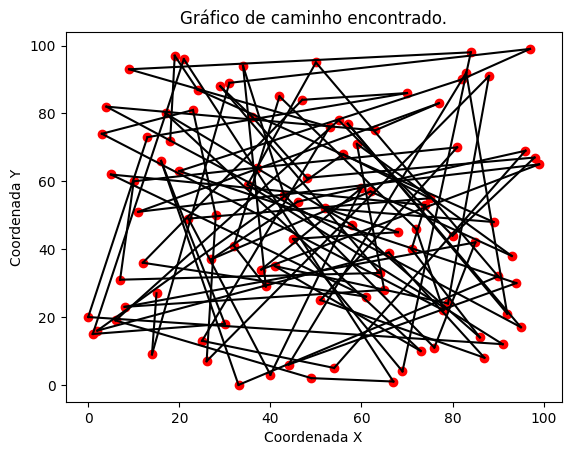

In [44]:
plt.title("Gráfico de caminho encontrado.")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.plot(x_points, y_points, 'ro')

for i in range(0, len(novaGeracao[0]) - 1):
  plt.plot([x_points[novaGeracao[0][i]], x_points[novaGeracao[0][i + 1]]], [y_points[novaGeracao[0][i]], y_points[novaGeracao[0][i + 1]]], 'k-')
  if i == len(novaGeracao[0]) - 1:
    plt.plot([x_points[novaGeracao[0][i + 1]], x_points[0]], [y_points[novaGeracao[0][i + 1]], y_points[0]], 'k-')
#plt.plot(x_points[0], y_points[0], 'go')
plt.show()